ME200, Johannes Ruf and Luitgard Veraart

# Day 6: Monte Carlo with Python

## Visualization of the law of large numbers

* Consider a Bernoulli random variable $X$ where $\mathbb{P}[X=1]=1/2 = \mathbb{P}[X=0]$.
* We estimate $p=\mathbb{E}[X]$ using the Monte Carlo estimator $\frac{1}{n} \sum_{i=1}^n X_i$ where $X_1, \ldots, X_n$ are an i.i.d. sample with the same distribution as $X$. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
sample_size = 200

rng = np.random.default_rng(seed=223344)
x = rng.choice([0, 1], size=sample_size)

Let us now compute the Monte Carlo estimator for each n less than or equal to `sample_size` and store the results in the array `xbar`.

In [35]:
xbar = np.cumsum(x) / np.arange(1, sample_size + 1)     # rolling average

* The above line of code performs elementwise division of the two arrays `np.cumsum(x)` and $[1, 2, 3, \ldots, 300]$.
* To see what `np.cumsum()` does, consider the following code:

In [36]:
np.cumsum([1, 2, 3, 4])

array([ 1,  3,  6, 10])

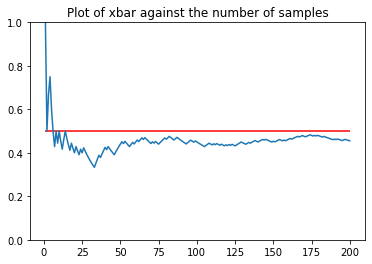

In [37]:
_, ax = plt.subplots()
ax.plot(np.arange(1, sample_size + 1), xbar)
ax.set_ylim([0, 1])
ax.hlines(1/2, xmin=1, xmax=sample_size, color='red')
ax.set_title('Plot of xbar against the number of samples');

We see that the values of `xbar` approach $1/2$, by the strong law of large numbers.

## 3.3) Some examples

### 3.3.1) Computing an integral with Monte Carlo

Imagine we are interested in the integral $\int_0^1 h(x) dx$ of the function 

\begin{align*}
	h(x) = \left(\cos(50x) + \sin(20x)\right)^2.
\end{align*}

Noting that the integral can be interpreted as $\mathbb{E}[h(U)]$, where $U$ is uniform, 
we can approximate it via Monte Carlo as follows.

In [16]:
def h(x):
    return (np.cos(50 * x) + np.sin(20 * x)) ** 2

In [17]:
sample_size = 100_000

rng = np.random.default_rng(334411)

x = h(rng.random(size=sample_size))

print('The Monte Carlo approximation of the integral is {:.4f}.'.format(np.mean(x)))

The Monte Carlo approximation of the integral is 0.9604.


Has it converged?  -- Easy to check with our visualization plot:

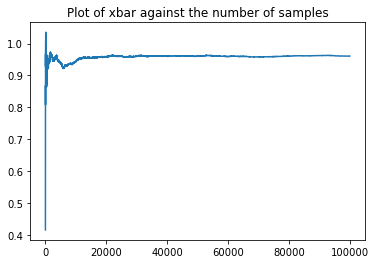

In [18]:
_, ax = plt.subplots()
running_average = np.cumsum(x) / np.arange(1, sample_size + 1)
ax.plot(np.arange(1, sample_size + 1), running_average)
ax.set_title('Plot of xbar against the number of samples');

Probably it's better to only start plotting after a a number of samples, say 1000 here:

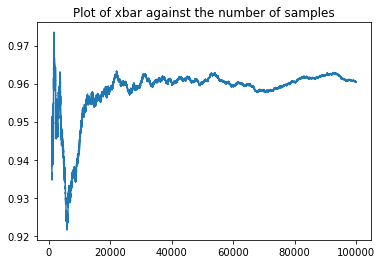

In [19]:
burn_in_samples = 1000

_, ax = plt.subplots()
running_average = np.cumsum(x) / np.arange(1, sample_size + 1)
ax.plot(np.arange(burn_in_samples, sample_size + 1), running_average[burn_in_samples - 1: ])
ax.set_title('Plot of xbar against the number of samples');

It seems that it has converged.

### 3.3.2) Approximating the normal CDF

Say, we are interested in obtaining (an approximation of) the normal CDF. Then here is a way.

In [20]:
y = [-1, 0, 1, 2, 3]   # the values for which we want to have the normal CDF

In [21]:
sample_size = 10**8
rng = np.random.default_rng(223344)
x = rng.standard_normal(size=sample_size)     # NumPy can directly generate normals

In [22]:
#np.mean(x), np.std(x), plt.hist(x, bins=100);   # [these are fast commands to check that x is as epected]

In [23]:
CDF_approx = np.array([np.mean(x < arg) for arg in y])

In [24]:
print('The approximation of the normal CDF at values {}: {}'.format(y, np.around(CDF_approx, 3)))

The approximation of the normal CDF at values [-1, 0, 1, 2, 3]: [0.159 0.5   0.841 0.977 0.999]


### 3.3.3) Monte Carlo estimate of $\pi$

* A famous example of Monte Carlo integration is the Monte Carlo estimate of $\pi$. 
* The unit disk $\{(x, y) : x^2 + y^2 \leq 1\}$ is inscribed in the square $[-1, 1] \times [-1, 1]$, which has area 4. 
* If we generate a large number of points that are Uniform on the square, the proportion of points falling inside the disk is approximately equal to the ratio of the disk's area to the square's area, which is $\pi/4$. 
* Thus, to estimate $\pi$ we can take the proportion of points inside the circle and multiply by 4.

In [25]:
sample_size = 10**6
rng = np.random.default_rng(seed=987654321)
x = rng.random(size=sample_size) * 2 - 1  # gives [-1, 1] uniformly distributed
y = rng.random(size=sample_size) * 2 - 1

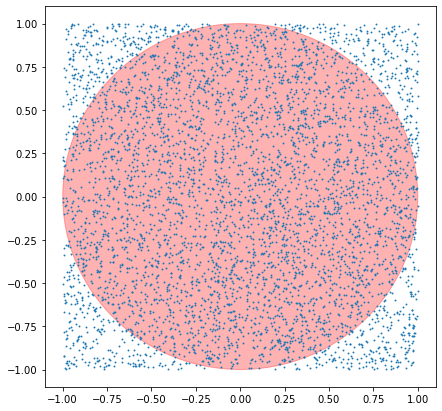

In [26]:
_, ax = plt.subplots(figsize=(7, 7))
ax.plot(x[:5000], y[:5000], linestyle='', marker='o', markersize=0.9)

ax.add_patch(plt.Circle((0, 0), 1, color='r', alpha=0.3));   
# not a command that will be very important for us

In [27]:
pi_estimate = 4 * np.mean(x**2 + y**2 < 1)
print(f'The Monte Carlo estimate of π equals {pi_estimate:.5f}; recall: the true π equals {np.pi:.5f}.')    
# Note the f before the string -- It allows using variables inside the curly brackets.

The Monte Carlo estimate of π equals 3.14485; recall: the true π equals 3.14159.
